### Временные ряды, общая теория

Загрузим необходимые библиотеки:

In [32]:
from scipy.stats import boxcox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
%matplotlib inline

Загрузим исходные ряды:

In [7]:
auto_registration = pd.read_csv("homework_monthly-us-auto-registration-tho.csv",sep=';')
dow_jones = pd.read_csv("homework_weekly-closings-of-the-dowjones-.csv")

all_series = {
    "Monthly U.S. auto registration": auto_registration["Count"],
    "Weekly closings of the Dow-Jones industrial average": dow_jones["Average"]
}

In [17]:
def show_plots():
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        layout = (3, 2)
        for i, key in enumerate(all_series.keys()):
            x = i % 2
            y = int((i - x) / 2)   
            ts_ax = plt.subplot2grid(layout, (y, x))
            all_series[key].plot(ax=ts_ax, color='blue')
            ts_ax.set_title(key)        
        plt.tight_layout()

Посмотрим, как выглядят наши ряды:

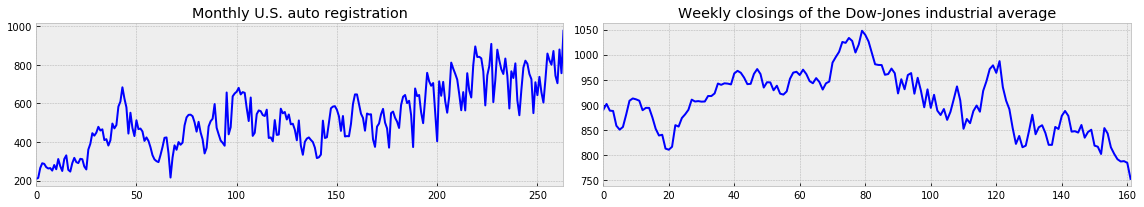

In [18]:
show_plots()

Сейчас они явно не стационарны, есть стренд, может быть сезонность, и слишком большой разброс дисперсии

In [27]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [28]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Построим график автокорреляции и частичной автокорреляции:

Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


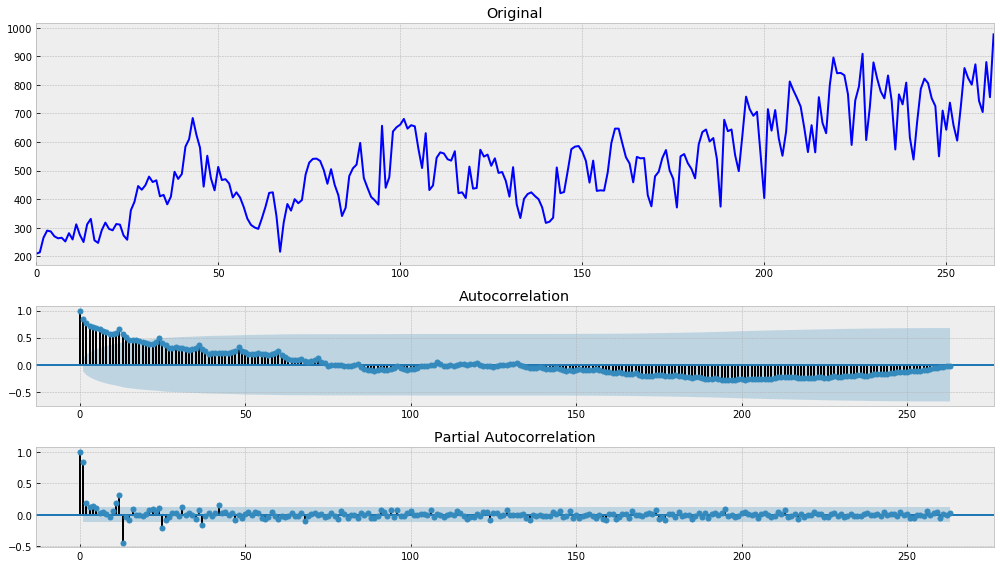

In [38]:
series_auto_registration = auto_registration['Count'] 
tsplot(series_auto_registration)

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


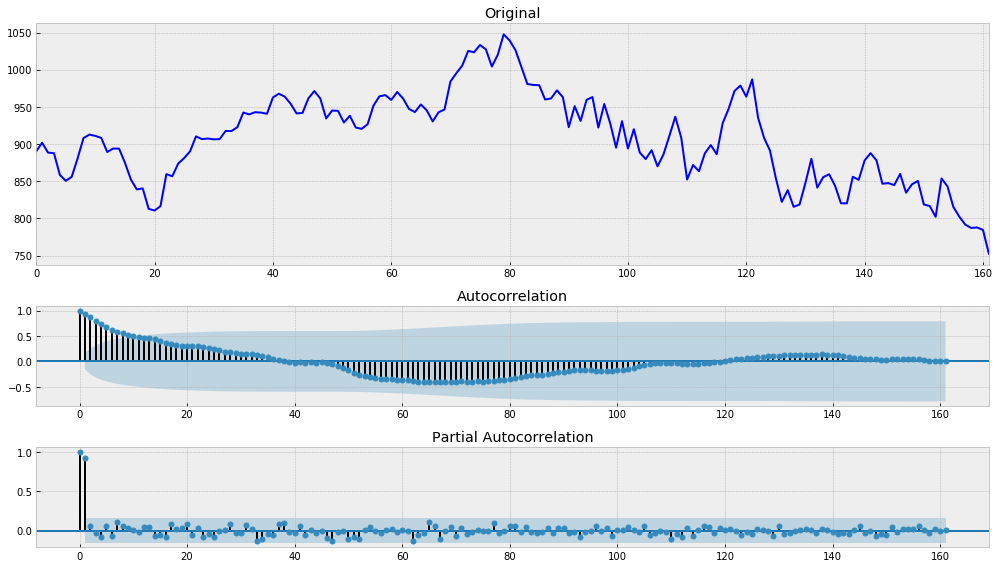

In [39]:
series_dow_jones = dow_jones['Average'] 
tsplot(series_dow_jones)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда (для обоих наборов данных). Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

## Нормализуем дисперсию

In [46]:
series_auto_registration = boxcox(series_auto_registration, 0)
series_dow_jones = boxcox(series_dow_jones, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.067568
p-value                          0.257754
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


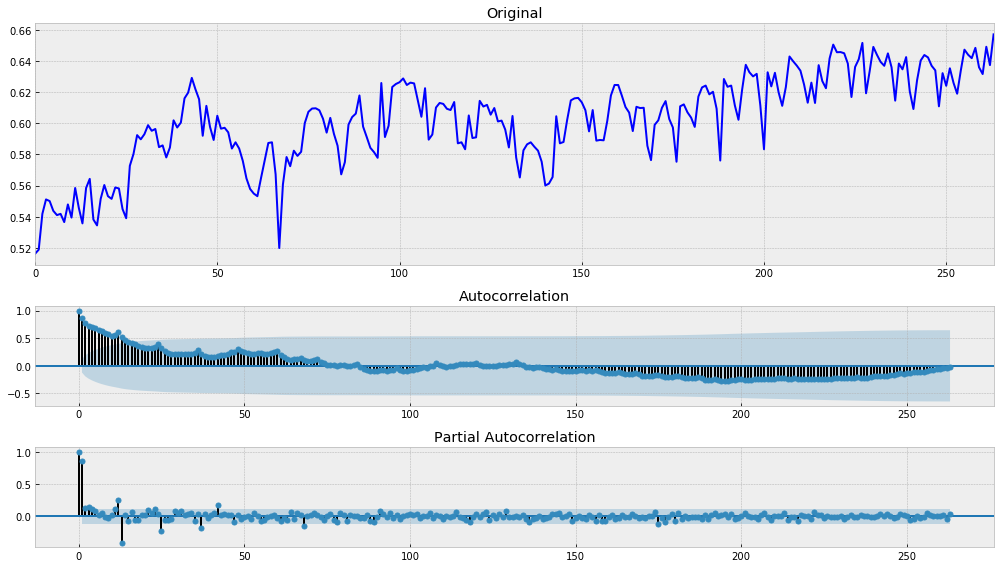

In [48]:
tsplot(series_auto_registration)

Results of Dickey-Fuller Test:
Test Statistic                  -1.185467
p-value                          0.679816
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


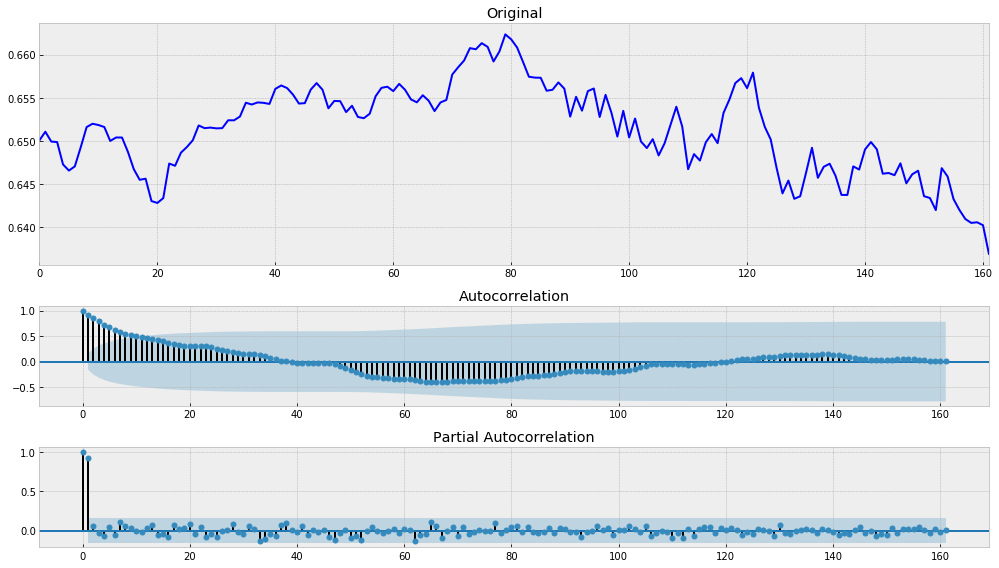

In [49]:
tsplot(series_dow_jones)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда.

In [52]:
series_auto_registration = series_auto_registration[1:] - series_auto_registration[:-1]
series_dow_jones = series_dow_jones[1:] - series_dow_jones[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -4.938379
p-value                          0.000029
#Lags Used                      11.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


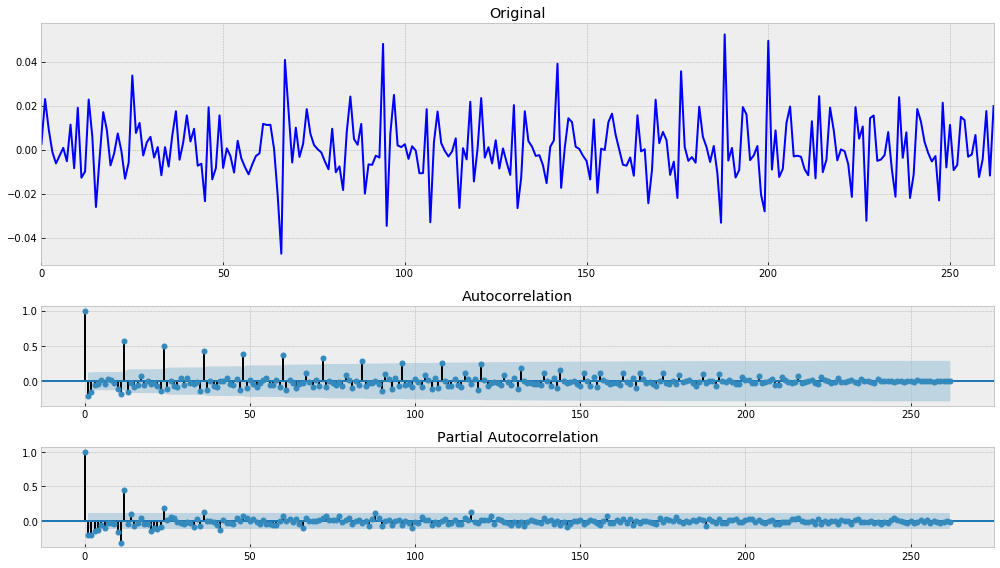

In [51]:
tsplot(series_auto_registration)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

In [54]:
series_auto_registration = series_auto_registration[12:] - series_auto_registration[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -7.029435e+00
p-value                        6.240574e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


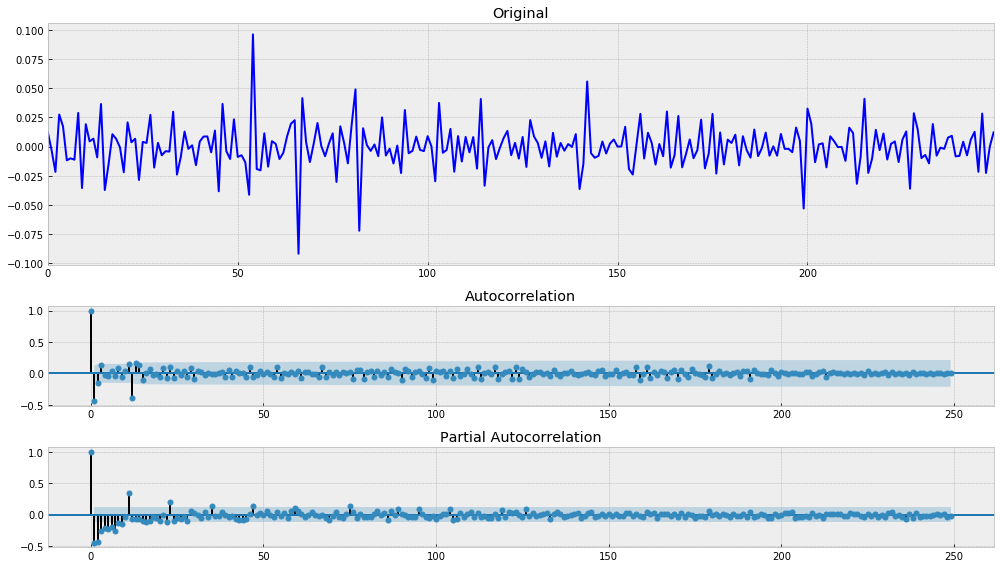

In [55]:
tsplot(series_auto_registration)

Теперь можно сказать, что ряд <b>Monthly U.S. auto registration</b>  - стационарный. Т.к. Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

Results of Dickey-Fuller Test:
Test Statistic                -1.298606e+01
p-value                        2.876758e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


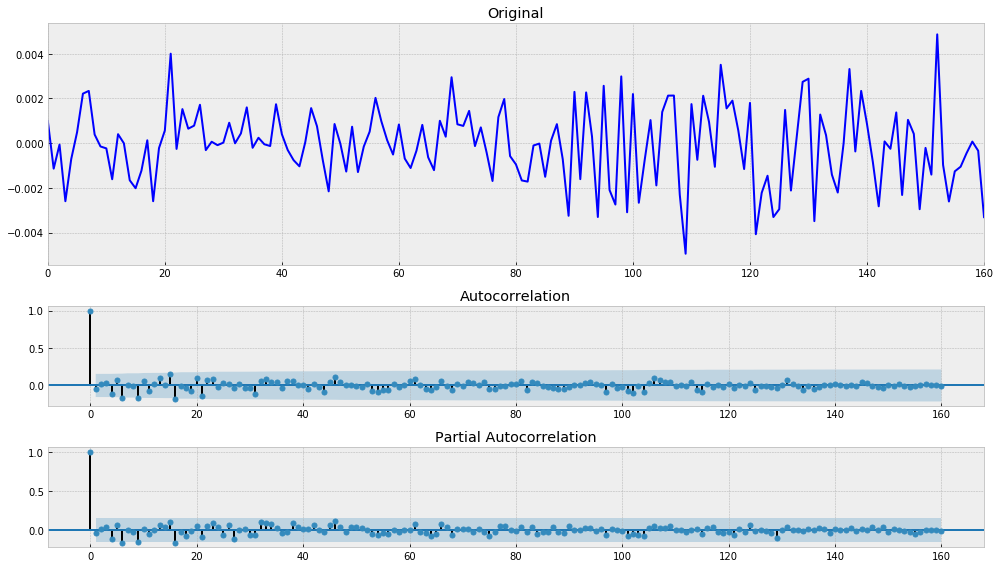

In [53]:
tsplot(series_dow_jones)

Теперь можно сказать, что ряд <b>Weekly closings of the Dow-Jones industrial average</b>  - стационарный. Т.к. Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!